In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fruits:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5857%2F2609027%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T134348Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D700a934865cd5072a3d61038562c51ac3ef6953437ac24d72f7f5a501223e5180718cc14053ac52d64cdbd9a92f232481e65384fb6fb1293833e362252ceb9201e30d39844f51c0c650b7a7c1afad2abdc333203493a3b172745f9c384e5c5c274d295a079df3a894dbe5b72e452d7ef7814cc54c469b5c73a56d87bef0295dca99f8a456e1980b55eee3aff0ea9815be5dd49c9aaf725540525c35873084bca17029be5183d64b551fd46bfb9ae7288413efcdeb6070748324985437a40125ffb0a566f9af5d1e6de76680941edacd939d02b3f0a9ce9c90ad97b5128b37f25d4afff972f08d21adc963be2d439d65d3d0683869bff0a0624aabca56ea478d2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1379678841 bytes downloaded
Downloaded and uncompressed: fruits
Data source import complete.


In [2]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Rambutan/281_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Rambutan/r_225_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Rambutan/r_283_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Rambutan/252_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Rambutan/47_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Rambutan/r_323_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Rambutan/r_319_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Rambutan/r_95_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Rambutan/46_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Rambutan/245_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Rambutan/r_48_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/164_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/135_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/r_72_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/130_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/228_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/r_210_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/r_225_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/252_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/245_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/r_48_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/r_49_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Limes/r_197_100.jpg
/kaggle/input/fruits/fruits-360_dataset/fruits-360/T

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Validation/apple_golden_2/r0_237.jpg
/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Validation/apple_golden_2/r1_257.jpg
/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Validation/apple_golden_2/r0_65.jpg
/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Validation/apple_golden_2/r1_53.jpg
/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Validation/apple_golden_2/r0_49.jpg
/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Validation/apple_golden_2/r1_57.jpg
/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Validation/apple_golden_2/r1_141.jpg
/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Validation/apple_golden_2/r1_281.jpg
/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Validation/apple_golden_2/r0_233.jpg
/kaggle/input/fruits/fruits-360

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

In [4]:
train_path = '../input/fruits/fruits-360_dataset/fruits-360/Training/'
test_path = '../input/fruits/fruits-360_dataset/fruits-360/Test/'

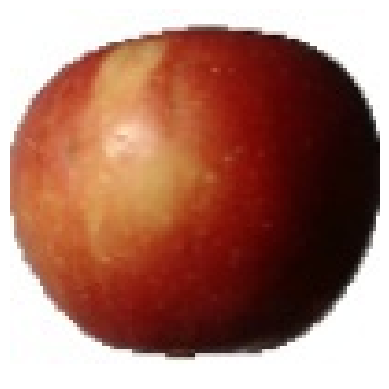

In [5]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

In [6]:
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Blueberry','Lemon', 'Kiwi']

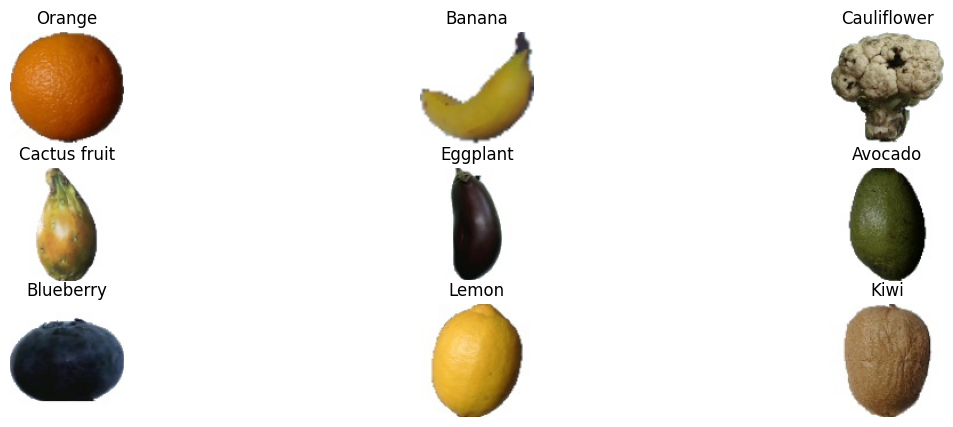

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(15,5))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    #fig.patch.set_facecolor('#E53090')
    #Above code adds a background color for subplots you can change the hex color code as you wish
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [8]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [9]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))#output
model.add(Activation("softmax"))

In [11]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                   

In [13]:
batch_size = 32

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [15]:
hist = model.fit_generator(generator = train_generator,
                   steps_per_epoch = 1600 // batch_size,
                   epochs = 50,
                   validation_data = test_generator,
                   validation_steps = 800 // batch_size)

<ipython-input-15-493e1e428aa6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


Epoch 1/50
50/50 [==============================] - 38s 713ms/step - loss: 4.7260 - accuracy: 0.0300 - val_loss: 4.2587 - val_accuracy: 0.0463
Epoch 2/50
50/50 [==============================] - 32s 638ms/step - loss: 3.9748 - accuracy: 0.0763 - val_loss: 3.5272 - val_accuracy: 0.1275
Epoch 3/50
50/50 [==============================] - 29s 588ms/step - loss: 3.4717 - accuracy: 0.1256 - val_loss: 2.8807 - val_accuracy: 0.2362
Epoch 4/50
50/50 [==============================] - 28s 550ms/step - loss: 2.9797 - accuracy: 0.1887 - val_loss: 2.4383 - val_accuracy: 0.3338
Epoch 5/50
50/50 [==============================] - 28s 567ms/step - loss: 2.5544 - accuracy: 0.2825 - val_loss: 1.9631 - val_accuracy: 0.4462
Epoch 6/50
50/50 [==============================] - 30s 594ms/step - loss: 2.1673 - accuracy: 0.3656 - val_loss: 1.4386 - val_accuracy: 0.5875
Epoch 7/50
50/50 [==============================] - 35s 709ms/step - loss: 1.9196 - accuracy: 0.4363 - val_loss: 1.3059 - val_accuracy: 0.5987

In [16]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


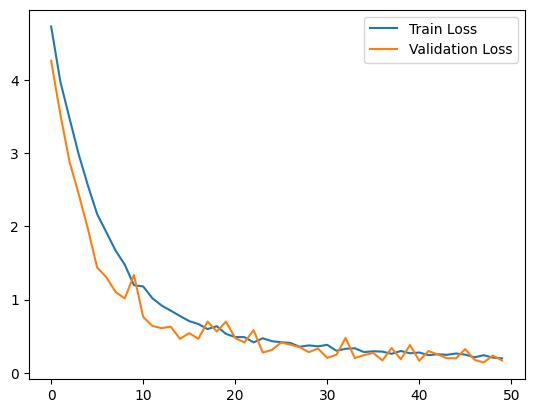

In [17]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

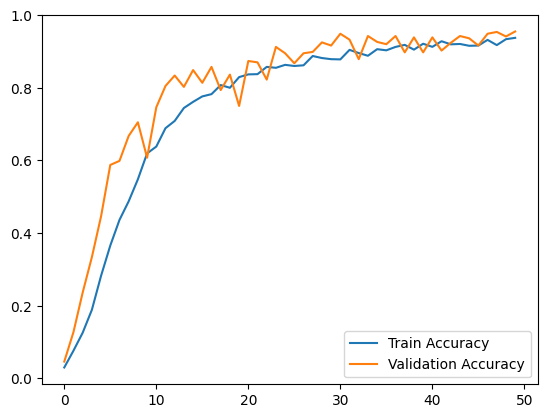

In [18]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()